In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install numpy
!pip install scikit-surprise

     |████████████████████████████████| 11.8MB 3.8MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617547 sha256=a43a85ae61a5ff86133822d8eeffab7a9bb99d4e13fcd89b40cde2c04cc9e553
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [3]:
!conda install -c conda-forge scikit-surprise

/bin/bash: conda: command not found


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from surprise import SVD
from surprise import Dataset
from surprise import Reader
import pickle
from surprise import accuracy
from surprise import BaselineOnly
from surprise.model_selection import train_test_split

In [51]:
full_rating = pd.read_csv('/content/drive/My Drive/Data_Science/full_rating_dataframe.csv' )
del full_rating['Unnamed: 0']
full_rating.head()

,user_id,book_id,rating
0,1,43.0,3
1,1,109.0,2
2,1,151.0,1
3,1,268.0,4
4,1,310.0,3


In [52]:
len(full_rating['book_id'].unique())

714

In [53]:
dff = pd.read_csv('/content/drive/My Drive/Data_Science/Mapping_df.csv' )
del dff['Unnamed: 0']
dff.head()

,article_id,title
0,0.0,detect malfunctioning iot sensors with streami...
1,2.0,"this week in data science (april 18, 2017)"
2,4.0,analyze ny restaurant data using spark in dsx
3,8.0,data science bowl 2017
4,9.0,3992 using apache spark to predict attack v...


In [54]:
len(dff['article_id'].unique())

714

In [55]:
id_to_name = {}
list1 = list(dff['article_id'])
list2 = list(dff['title'])
for i in range(len(list1)-1):
    id_to_name[list1[i]] = list2[i] 

In [56]:
# Load our data into DataSet class of surprise package
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(full_rating[['user_id', 'book_id', 'rating']], reader)

In [57]:
# split into trainset and testset
trainset, testset = train_test_split(data, test_size=.10)
train_eval = trainset.build_testset()

In [58]:
# train a Funk SGD-SVD algorithms:
epochs = [1, 5, 10, 20, 40, 80, 100, 120, 150]
train_mse = []
test_mse = []
for n_epoch in epochs:
    print("Number of epochs trained", n_epoch)
    algo = SVD(n_factors = 40, lr_all = 0.001, n_epochs = n_epoch)
    algo.fit(trainset)
    train_predictions = algo.test(train_eval)
    test_predictions = algo.test(testset)
    train_mse.append(accuracy.mse(train_predictions))
    test_mse.append(accuracy.mse(test_predictions))
    print(accuracy.mse(train_predictions), accuracy.mse(test_predictions))

Number of epochs trained 1
MSE: 2.8939
MSE: 2.9364
MSE: 2.8939
MSE: 2.9364
2.8938693878701676 2.9363651519572613
Number of epochs trained 5
MSE: 2.8424
MSE: 2.9455
MSE: 2.8424
MSE: 2.9455
2.8424101932517236 2.9455264058628776
Number of epochs trained 10
MSE: 2.7884
MSE: 2.9541
MSE: 2.7884
MSE: 2.9541
2.788405495528064 2.954132913295498
Number of epochs trained 20
MSE: 2.6992
MSE: 2.9733
MSE: 2.6992
MSE: 2.9733
2.699249546557798 2.9733181823324597
Number of epochs trained 40
MSE: 2.5225
MSE: 3.0094
MSE: 2.5225
MSE: 3.0094
2.522545014618001 3.009364960775416
Number of epochs trained 80
MSE: 1.9421
MSE: 3.1061
MSE: 1.9421
MSE: 3.1061
1.9421127261172293 3.106085140168218
Number of epochs trained 100
MSE: 1.5611
MSE: 3.1452
MSE: 1.5611
MSE: 3.1452
1.5611348144225816 3.1451759253619205
Number of epochs trained 120
MSE: 1.2094
MSE: 3.2458
MSE: 1.2094
MSE: 3.2458
1.20943447302858 3.245788843726028
Number of epochs trained 150
MSE: 0.8238
MSE: 3.3666
MSE: 0.8238
MSE: 3.3666
0.8238237720669561 3

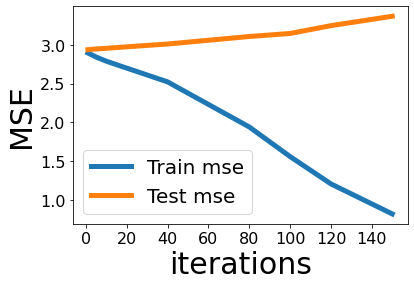

In [59]:
def plot_learning_curve(iter_array, train_accuracy, test_accuracy, xlabel = 'iterations'):
    plt.plot(iter_array, train_accuracy,
             label='Train mse', linewidth=5)
    plt.plot(iter_array, test_accuracy,
             label='Test mse', linewidth=5)


    plt.xticks(fontsize=16);
    plt.yticks(fontsize=16);
    plt.xlabel(xlabel, fontsize=30);
    plt.ylabel('MSE', fontsize=30);
    plt.legend(loc='best', fontsize=20);

plot_learning_curve(epochs, train_mse, test_mse)

In [60]:
#train on a full dataset and make prediction
full_trainset = data.build_full_trainset()
algo = SVD(n_factors = 40, lr_all = 0.001, verbose=True, n_epochs = 100)
algo.fit(full_trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

In [63]:
# make prediction:
all_book_id = full_rating.book_id.unique()
top_n = []
for book_id in all_book_id:
    top_n.append(algo.predict(uid = 500	, iid = book_id))
    top_n.sort(key=lambda x: x.est, reverse=True)
print([id_to_name[pred.iid] for pred in top_n[:10]])

['percentage of internet users by country', 'poverty (2015): united states demographic measures', 'blogging with brunel', 'this week in data science (july 26, 2016)', 'consumer prices', 'ibm cloud sql query', 'best practices for custom models in watson visual recognition', 'transfer learning for flight delay prediction via variational autoencoders', 'data science of variable selection', 'the art of side effects: curing apache spark streaming’s amnesia (part 1/2)']


In [64]:
pickle.dump(algo, open("final_algo.pkl", "wb"))

In [ ]:
list(full_rating['user_id'].unique())